In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from PIL import Image
from scipy.integrate import ode

In [2]:
import PM_2D_dirichlet as D2

In [3]:
# Diffusion function
g = lambda s: 1/(1+s)
g_exp = lambda s: np.exp(-s)

# Test function
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

# Create random 1D function
def generate_random1D(M):
    I = np.zeros(M+2)
    s = (M + 2)//5
    for i in range(5):
        I[i*s:(i+1)*s+1] = 10*np.random.randint(1, 5)
        
    # Add noise to interior points
    I[1:-1] = I[1:-1] + np.random.normal(0, 2, size = M)
    return I

dt <  1.5500031000061998e-05


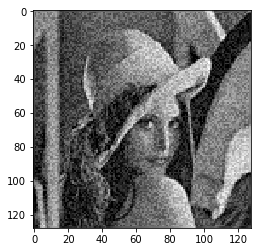

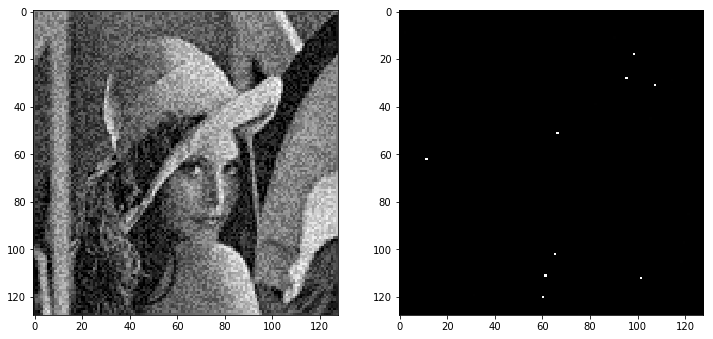

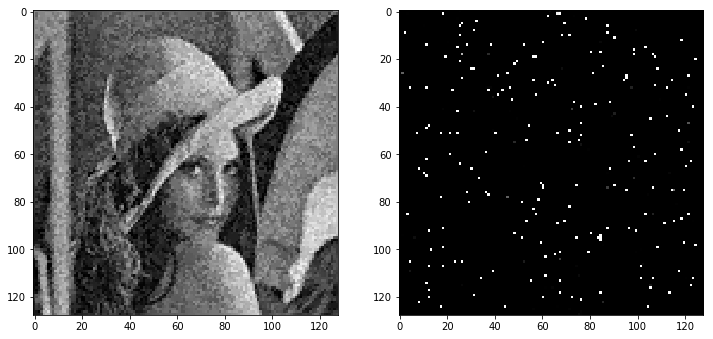

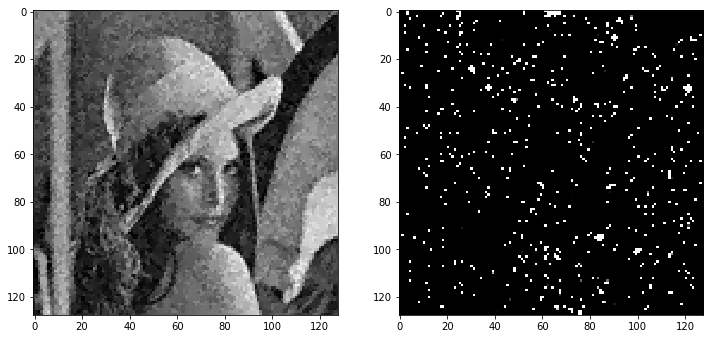

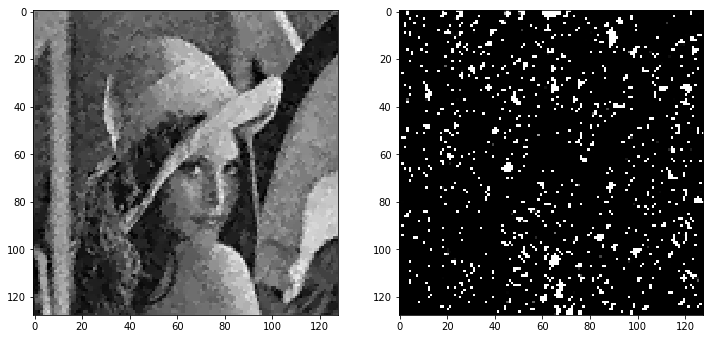

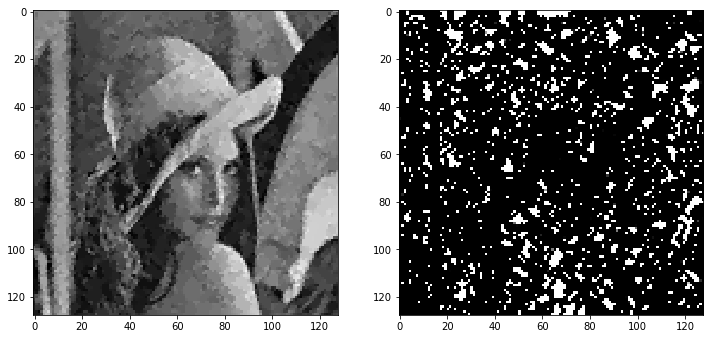

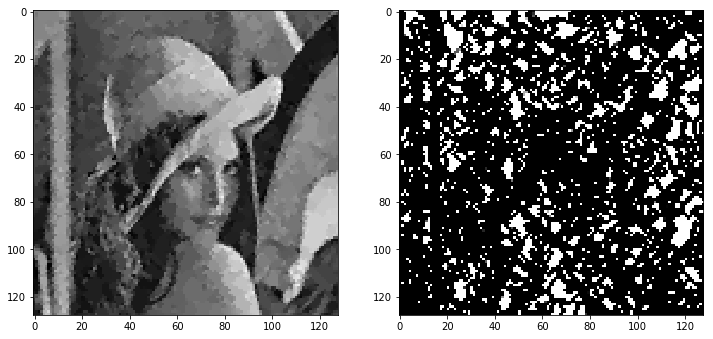

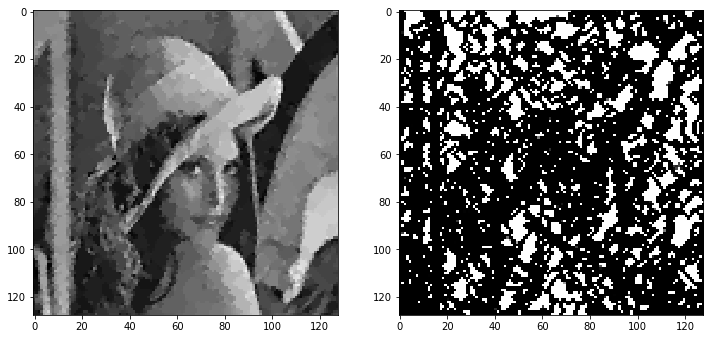

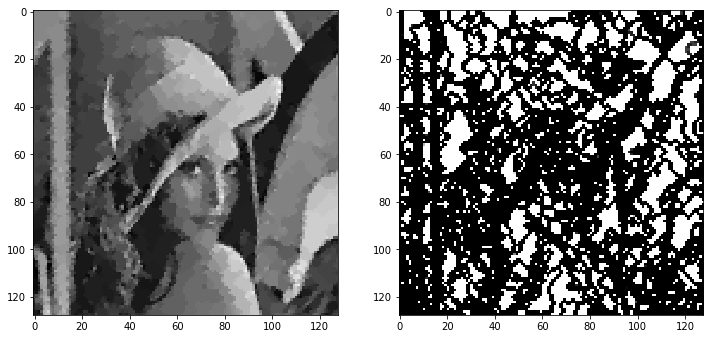

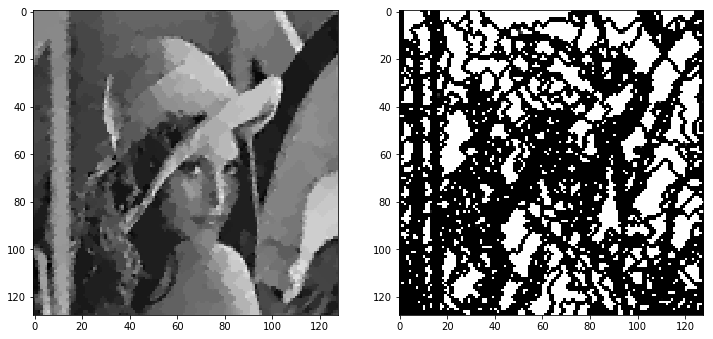

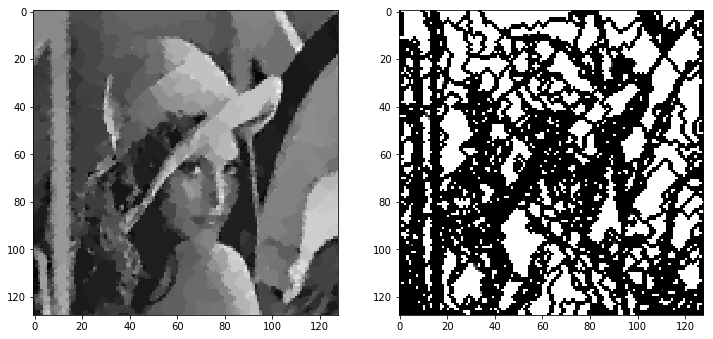

2270.9596868054327

In [26]:
M, N = 126, 126
K = (M+2)*(N+2)
dx, dy = 1/(M+1), 1/(N+1)
print("dt < ", 1/((2/dx**2) + 2/(dy**2)))

T = 100
dt = 1
g = lambda s: 1/(1+s)

I = D2.load_image("./images/lena-128x128.jpg", (M+2, N+2))
I = D2.add_noise2D(I, scale = 35)

plt.figure()
plt.imshow(I, cmap = "gray")
plt.show()

# U = D2.solve_FE(I.reshape(K), g, M, N, T, dt, echo = True)
U = D2.solve_BE(I.reshape(K), g, M, N, T, dt, echo = True)
np.linalg.norm(U[-1]-U[0])

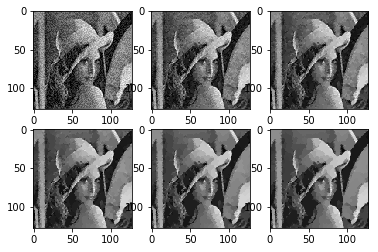

In [27]:
D2.before_after_2D(U, N, M)

In [ ]:
np.linalg.norm(U[1]-U[0], "fro")